In [5]:
import pandas as pd
import nltk
import pickle

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stu5/s1/rgg2706/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Get the twitter data
twitter_data = pd.read_csv('./twitter_data_1600000.csv')

# Shuffle the data
shuffled_df = twitter_data.sample(frac=1, random_state=42)

# Preprocess the data
def preprocess(tweet):
    tokens = word_tokenize(tweet)
    tokens = [token.lower() for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Feature extractor
def extract_features(document):
    return {word: True for word in word_tokenize(document)}

# Create the features dataset
feature_sets = [(extract_features(preprocess(row['tweet'])), row['target']) for index, row in shuffled_df.iterrows()]

# Split the data into training and test
split_point = int(len(feature_sets) * 0.7)
training_set = feature_sets[:split_point]
testing_set = feature_sets[split_point:]


In [7]:
# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(training_set)

# Freese the classifier 
with open('naive_bayes_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [8]:
# Free and Load the classifier 

with open('naive_bayes_classifier.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)

Accuracy: 0.7690854166666666, Precision: 0.7725171631600882, Recall: 0.7691311134191121


Text(0.5, 1.0, 'Confusion Matrix')

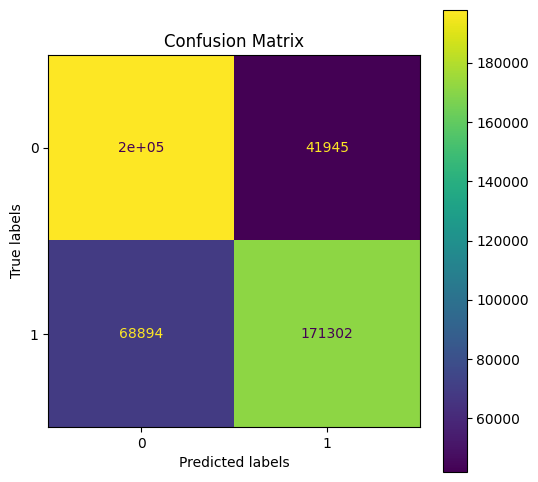

In [9]:
# Extract true labels and predicted labels
test_labels = [label for (_, label) in testing_set]
predicted_labels = [loaded_classifier.classify(features) for (features, _) in testing_set]

# Calculate Metrics using sklearn
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

# Create a confusion matrix with sklearn and matplotlib
cm = confusion_matrix(test_labels, predicted_labels)

cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,6))
# cm_display.plot(ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# print(cm)
# plt.show()

In [10]:
elon_tweets = pd.read_csv('./elon_musk_tweets_2010-2022.csv')

elon_tweets['tweet'] = elon_tweets['tweet'].apply(preprocess)

new_features = [extract_features(tweet) for tweet in elon_tweets['tweet']]
predicted_labels = [classifier.classify(features) for features in new_features]

# Add the predicted labels to the DataFrame
elon_tweets['predicted_label'] = predicted_labels

elon_tweets.to_csv('classified_elon_musk_tweets.csv', index=False)
